In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
store_sales = pd.read_csv('train.csv')
print(store_sales.sample(10))

              date  store  item  sales
262045  2015-07-17      4    15    120
643492  2015-01-11      3    36     55
439326  2015-12-23      1    25     38
632950  2016-02-29      7    35     40
11422   2014-04-12      7     1     13
204749  2013-08-26      3    12     67
362999  2016-12-22      9    20     42
725581  2014-10-22      8    40     34
133584  2013-10-14      4     8     62
741440  2013-03-26      7    41      5


Check for null values in the dataset.

In [68]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


Dropping store and item columns

In [69]:
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [70]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


Converting date from object datatype to datetime datatype.

In [71]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [72]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


Converting date to a month period and then sum the number of items in each month.

In [73]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

Converting resulting date column to timestamp datatype.

In [74]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [75]:
print(monthly_sales.head(10))

        date   sales
0 2013-01-01  454904
1 2013-02-01  459417
2 2013-03-01  617382
3 2013-04-01  682274
4 2013-05-01  763242
5 2013-06-01  795597
6 2013-07-01  855922
7 2013-08-01  766761
8 2013-09-01  689907
9 2013-10-01  656587


Vizualization

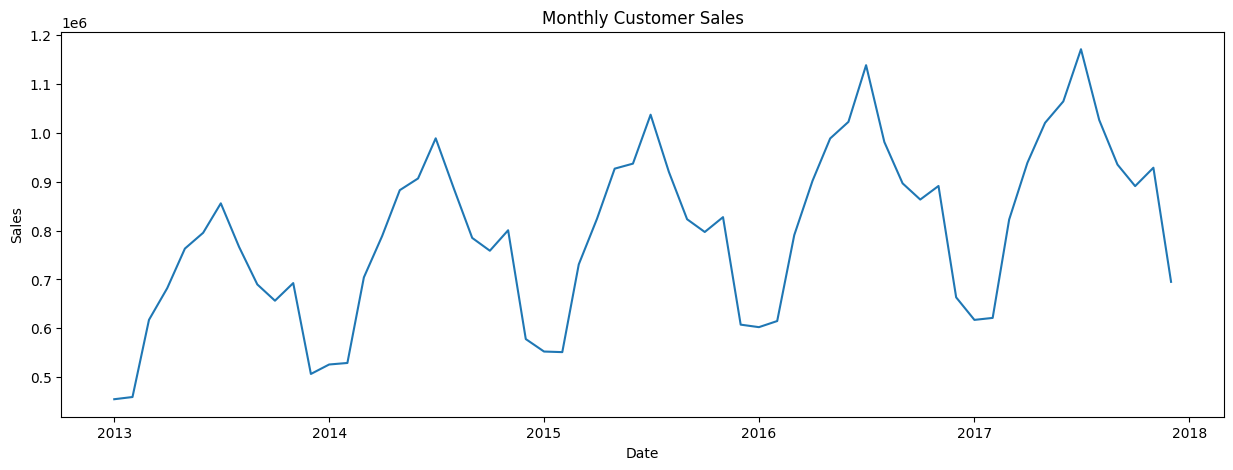

In [76]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Customer Sales')
plt.show()

Call the difference on the sales columns to make the sales data stationary.

In [77]:
print(monthly_sales.head(10))

        date   sales
0 2013-01-01  454904
1 2013-02-01  459417
2 2013-03-01  617382
3 2013-04-01  682274
4 2013-05-01  763242
5 2013-06-01  795597
6 2013-07-01  855922
7 2013-08-01  766761
8 2013-09-01  689907
9 2013-10-01  656587


In [78]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
print(monthly_sales.head(10))

         date   sales  sales_diff
1  2013-02-01  459417      4513.0
2  2013-03-01  617382    157965.0
3  2013-04-01  682274     64892.0
4  2013-05-01  763242     80968.0
5  2013-06-01  795597     32355.0
6  2013-07-01  855922     60325.0
7  2013-08-01  766761    -89161.0
8  2013-09-01  689907    -76854.0
9  2013-10-01  656587    -33320.0
10 2013-11-01  692643     36056.0


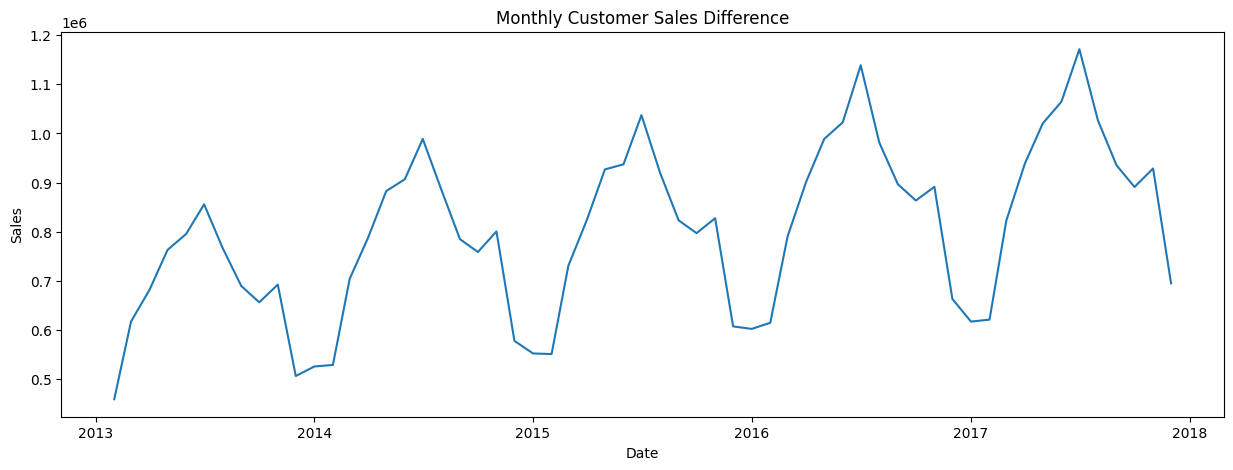

In [79]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Customer Sales Difference')
plt.show()

Dropping of sales and date

In [80]:
supervised_data = monthly_sales.drop(['sales', 'date'], axis=1)

Preparing the supervised data

In [81]:
for i in range(1, 13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
print(supervised_data.head(10))

   sales_diff   month_1   month_2   month_3   month_4   month_5   month_6  \
0      3130.0   19380.0 -186036.0   36056.0  -33320.0  -76854.0  -89161.0   
1    175184.0    3130.0   19380.0 -186036.0   36056.0  -33320.0  -76854.0   
2     84613.0  175184.0    3130.0   19380.0 -186036.0   36056.0  -33320.0   
3     93963.0   84613.0  175184.0    3130.0   19380.0 -186036.0   36056.0   
4     23965.0   93963.0   84613.0  175184.0    3130.0   19380.0 -186036.0   
5     82168.0   23965.0   93963.0   84613.0  175184.0    3130.0   19380.0   
6   -103414.0   82168.0   23965.0   93963.0   84613.0  175184.0    3130.0   
7   -100472.0 -103414.0   82168.0   23965.0   93963.0   84613.0  175184.0   
8    -26241.0 -100472.0 -103414.0   82168.0   23965.0   93963.0   84613.0   
9     41900.0  -26241.0 -100472.0 -103414.0   82168.0   23965.0   93963.0   

    month_7   month_8   month_9  month_10  month_11  month_12  
0   60325.0   32355.0   80968.0   64892.0  157965.0    4513.0  
1  -89161.0   60325.0   

Split the data into train and test.

In [82]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (35, 13)
Test Data Shape: (12, 13)


In [83]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [84]:
X_train, y_train = train_data[:, 1:], train_data[:, 0:1]
X_test, y_test = test_data[:, 1:], test_data[:, 0:1]

In [85]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [86]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


Make prediction dataframe to merge the predicted sales prices of all trained algorithms

In [87]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [88]:
print(predict_df)

         date
0  2017-01-01
1  2017-02-01
2  2017-03-01
3  2017-04-01
4  2017-05-01
5  2017-06-01
6  2017-07-01
7  2017-08-01
8  2017-09-01
9  2017-10-01
10 2017-11-01
11 2017-12-01


In [89]:
act_sales = monthly_sales['sales'][-13:].to_list()

In [90]:
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


To create the linear regression model, and predicted output.

In [91]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre = lr_model.predict(X_test)

In [92]:
lr_pre

array([ 0.0427074 ,  0.17284957,  1.09083796,  0.71220971,  0.58376708,
        0.33753568,  0.79053303, -0.71169155, -0.29772672, -0.01470231,
        0.24425358, -1.02944627])

In [93]:
lr_pre = lr_pre.reshape(-1, 1)
# This is a set matrix
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [94]:
result_list = []
for index in range(len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name='Linear Prediction')
predict_df = predict_df.merge(lr_pre_series, left_index=True, right_index=True)

In [95]:
print(predict_df)

         date  Linear Prediction
0  2017-01-01       6.479148e+05
1  2017-02-01       6.283374e+05
2  2017-03-01       8.195190e+05
3  2017-04-01       9.436391e+05
4  2017-05-01       1.033653e+06
5  2017-06-01       1.065286e+06
6  2017-07-01       1.201561e+06
7  2017-08-01       1.002123e+06
8  2017-09-01       9.415142e+05
9  2017-10-01       9.080646e+05
10 2017-11-01       9.167461e+05
11 2017-12-01       6.947978e+05


In [96]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MSE:", lr_mse)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression R2:", lr_r2)

Linear Regression MSE: 16221.272385416896
Linear Regression MAE: 12433.184266490784
Linear Regression R2: 0.9906152516380968


Vizualization of the prediction againest the actual sales

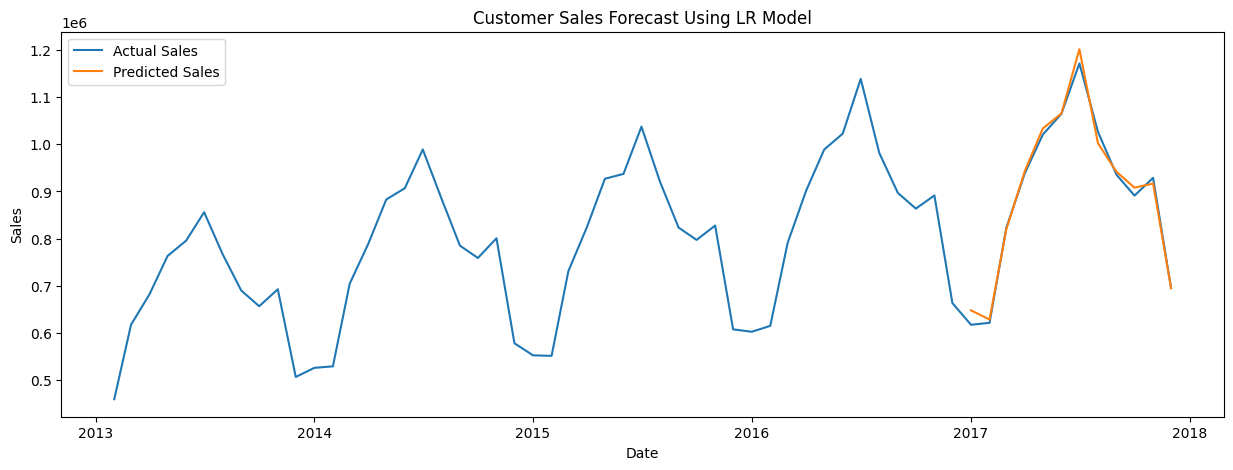

In [97]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title('Customer Sales Forecast Using LR Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()